In [15]:
import random
import matplotlib.pyplot as plt
import csv 

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [16]:
def game(ra, rb): #simulating a game between player_a and player_b
    prob_a = ra/(ra+rb)
    player_a = 0
    player_b = 0
    points_to_win = 11

    while True:
        r = random.random()
        if prob_a > r:
            player_a += 1
        else:
            player_b += 1
        if player_a >= points_to_win or player_b >= points_to_win:
            if abs(player_a - player_b) > 2:
                break
    return (player_a, player_b)

**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [17]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [18]:
def win_probability_game(ra, rb, simulations): #probability that player_a will win against player_b in simulation games
    player_a_wins = 0

    for i in range(simulations):
        player_a, player_b = game(ra, rb)
        if player_a > player_b: 
            player_a_wins += 1

    prob = player_a_wins/simulations
    return prob 

**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [19]:
# Print win_probability_game(70, 30) to 2 decimal places for a suitable value of n:
print(round(win_probability_game(70, 30, 50), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [20]:
def read_abilities(csv_file): # HINT: what should the argument be?
    data = list() #create list
    with open(csv_file) as csvfile: #open variable as csvfile
        reader = csv.reader(csvfile) 
        next(reader) #skip first row
        for row in reader: 
            data.append((int(row[0]), int(row[1]))) #for each row, add each row to the list
    return data

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [21]:
# Print the result of calling the function for the file `test.csv`
print(read_abilities(csv_file="test.csv"))

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]


**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [22]:
def plot_win_probabilities(values): # HINT: what should the argument be?
    X = list()
    Y = list()
    for i in values:
        X.append(int(i[0])/int(i[1]))
        Y.append(win_probability_game(int(i[0]), int(i[1]), 1000))
    plt.title("Probability that player_a beats player_b vs ra/rb")
    plt.xlabel("ra/rb")
    plt.ylabel("Probability that a wins")
    plt.axis([0, 3, 0, 1])
    plt.plot(X, Y, 'bo')
    plt.show()

**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


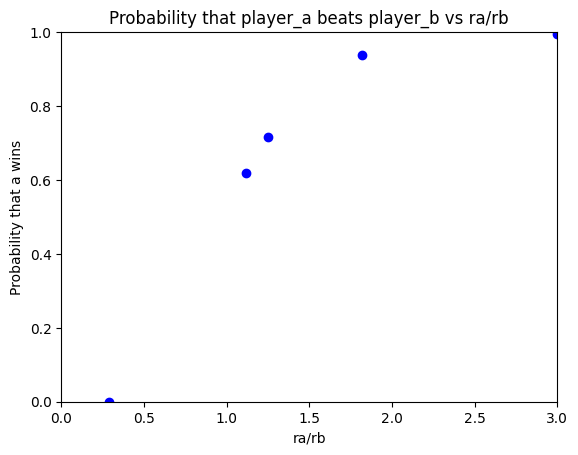

In [23]:
# Call the function to plot the figure here
plot_win_probabilities(read_abilities(csv_file="test.csv"))

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [24]:
def win_probability_match(ra, rb, simulations, m):
    player_a_match_wins_in_simulation = 0
    player_a_wins = 0
    player_b_wins = 0

    for i in range(simulations):

        while player_a_wins < m and player_b_wins < m:
            winner = game(ra, rb)
            if winner[0] > winner[1]:
                player_a_wins += 1
            else:
                player_b_wins += 1

    prob_match = player_a_wins/simulations
    return prob_match

simulations = 1000 # can be any value
m = 1
while win_probability_match(60, 40, simulations, m) < 0.9:
    m += 1
print(f"The lowest amount of wins needed in {simulations} games to get at least a probability of 0.9 is {m} games")

print(win_probability_match(60, 40, 1000, 900))

The lowest amount of wins needed in 1000 games to get at least a probability of 0.9 is 900 games
0.9


Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

## Problem

The objective of this investigation is to compare and examine between the 2 scoring methods of squash matches, English and PARS (Point-a-Rally Scoring), ultimately evaluating which is the "better" scoring method. The measure of "better" will be determined based on the fairness and the match durations of each scoring method, experimenting whether the better player, determined by a higher relative ability number, typically ends up winning, moreover within less time for one of the scoring methods.


## Method

To measure the objective of this investigation, a simulation of squash matches for both scoring methods will be conducted. 

#### Parameters and Measurements 

1. Scoring Methods: English and PARS.

2. Independent Variable:
    - At least 50 different combination values for ra/rb, each value tested a specific amount of times for more accurate results.
    
3. Dependent Variables:
    - Fairness (Match outcome of the better player across both scoring methods).
    - Match Durations (Average duration of matches for each ra/rb values).

#### Replicability

Method is stated with sufficient detail to allow a replication of the results.

## Hypothesis
1. The PARS scoring method should generally have a shorter average match durations than the English scoring method.
2. The player with the highest player ability number typically wins the squash matches.

## Assumptions

1. A controlled variable of the investigation is that each rally in a match will take equal time, despite the type of scoring method.
2. Another controlled variable is the ability of player b (rb), it should remain consistent throughout the investigation.
2. The simulation accurately represents real-world squash match rules for both scoring methods.
3. The relative values ra/rb should accurately represent the player's real abilities.

## Experimentation

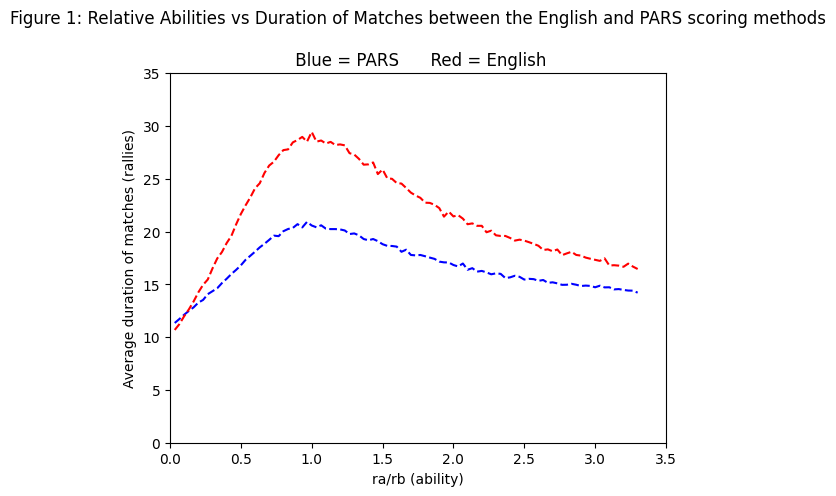

Figure 2: The win probability for the player (player a) with the higher ability number for the PARS scoring method:

0.85
0.85
0.87
0.86
0.85
0.86
0.85
0.86
0.84
0.85

Figure 3: The win probability for the player (player a) with the higher ability number for the English scoring method:

0.88
0.89
0.88
0.88
0.91
0.89
0.88
0.89
0.86
0.86


In [27]:
def EnglishGame(ra, rb):
    prob_a = ra/(ra+rb)
    player_a = 0
    player_b = 0
    rallies = 0
    points_to_win = 9
    gameOver = False
    server = ""

    while gameOver == False:
        r = random.random()
        if prob_a > r:
            if server == "a":
                player_a += 1
            else:
                server = "a"
        else:
            if server == "b":
                player_b += 1
            else:
                server = "b"
        if player_a == 8 and player_b == 8:
            if 0.5 > r: 
                points_to_win = 10
        rallies += 1 
        
        if player_a >= points_to_win or player_b >= points_to_win:
            gameOver = True
    return player_a, player_b, rallies

def pars_average_rallies(ra, rb, n):
    pRallies = 0
    for i in range(n):
        player_a, player_b = game(ra, rb)
        pRallies += (player_a + player_b)
    pRallies = round((pRallies/n), 2)
    return pRallies

def eng_average_rallies(ra, rb, n):
    eRallies = 0
    for i in range(n):
        rallies_a_game = EnglishGame(ra, rb)[2]
        eRallies += rallies_a_game
    eRallies = round((eRallies/n), 2)
    return eRallies

def plot_results(player_range):
    eng_rallies = list()
    pars_rallies = list()
    X = list()

    for i in player_range:
        eng_rallies.append(eng_average_rallies(i[0], i[1], 1000))
        pars_rallies.append(pars_average_rallies(i[0], i[1], 1000))
        X.append(i[0]/i[1])

    plt.plot(X, pars_rallies, "b--", label="PARS (Point-a-Rally) Scoring Method")
    plt.plot(X, eng_rallies, "r--", label="English Scoring Method")
    plt.title("Figure 1: Relative Abilities vs Duration of Matches between the English and PARS scoring methods\n\n Blue = PARS      Red = English")
    plt.xlabel("ra/rb (ability)")
    plt.ylabel("Average duration of matches (rallies)")
    plt.axis([0, 3.5, 0, 35])
    plt.show()

plot_results(read_abilities(csv_file="relativeAbility.csv"))

def win_probability_game(ra, rb, simulations): 
    player_a_wins = 0

    for i in range(simulations):
        player_a, player_b = game(ra, rb)
        if player_a > player_b: 
            player_a_wins += 1

    prob = player_a_wins/simulations
    return prob 

print("Figure 2: The win probability for the player (player a) with the higher ability number for the PARS scoring method:\n")

for i in range(10):
    print(round(win_probability_game(60, 40, 1000), 2))

def eng_win_probability_game(ra, rb, simulations): 
    player_a_wins = 0

    for i in range(simulations):
        player_a, player_b, rallies = EnglishGame(ra, rb)
        if player_a > player_b: 
            player_a_wins += 1

    prob = player_a_wins/simulations
    return prob 

print("\nFigure 3: The win probability for the player (player a) with the higher ability number for the English scoring method:\n")

for i in range(10):
    print(round(eng_win_probability_game(60, 40, 1000), 2))

## Results

After taking consideration to the objective of the investigation, the method, and the assumptions, an experiment was conducted to test the 2 different scoring methods on both the win probability of the player with the higher ability number, and the duration of matches between the 2 scoring methods. 

Firstly, figure 1 displays the average duration of matches (measured in rallies) for both scoring methods with a controlled ra/rb ability range. The ra/rb ability range values are listed in the csv file "relativeAbility" attached to this same folder. The blue line represents the PARS scoring method while the red line represents the English scoring method. Observing the graph, the PARS scoring method mostly has a lower average duration of matches when compared to the English scoring method. The only anomaly is prior to the intersection point between both lines, where the English scoring method has a lower average duration of matches. Referring to the hypothesis, figure 1 proves that PARS will generally create shorter squash games, which ends up being preferable such as for televisions. 

Secondly, a win probability test (figure 2 and figure 3) for player a, the player with the higher ability number, was tested 10 times for each scoring methods, the conclusion drawn from this is that despite the scoring methods and how many times a simulation is ran, the player with the higher ability number will typically win the squash match with always having a win probability of 0.8 and above (maximum win probability being set at 1.0).

## Conclusions

In conclusion, the hypothesis of the experiment has proven to be correct, since both scoring methods prove that the player with the higher ability number will for the most part win, it is reasonable to conclude that PARS generally is the better scoring method, as it provides a shorter average match duration to promote efficiency in match play while keeping a realistic and fair scoring method that the stronger player typically wins. 

However, limitations to the investigation are the player ability representations and win probability are simplified, the model assumes that the player’s ability and win probability will remain it’s assigned value throughout all matches, decreasing the realism and takes out the possibility of interruptions with the player’s physical performance and environmental factors. Additionally, the assumption of each rally taking equal time takes away more realism from this investigation as each rally should have different durations.

With that said, potential future extensions to the investigation could bring in more realistic components, such as a more dynamic player ability model where the player’s ability varies throughout a single match, different rally durations each time, and player factors such as player fatigue. 

Regardless, the investigation was successful in terms of comparing and contrasting between the 2 scoring methods for squash, as well as the knowledge gained from learning to model the simulations of this investigation through Python. 